In [17]:
#Step 1: Install dependencies

!pip install pandas requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [18]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
#Step 2: Download HTML

import requests

# Select the resource to download
resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

# Request to download the file from the Internet
response = requests.get(resource_url)

# If the request was executed correctly (code 200), then the file could be downloaded
if response:
    # The file is stored in the current directory for later use
    with open("tesla_revenue.csv", "wb") as dataset:
        dataset.write(response.content)

In [20]:
#Step 3: Transform the HTML

import requests
import time
from bs4 import BeautifulSoup

# Select the resource to download
resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

# Request to download the file from the Internet
response = requests.get(resource_url, time.sleep(10))

# If the request has been executed correctly (code 200), then the HTML content of the page has been downloaded
if response:
    # We transform the flat HTML into real HTML (structured and nested, tree-like)
    soup = BeautifulSoup(response.text, 'html')
    soup


In [25]:
#Find all the tables.

tables = soup.find_all("table")

In [26]:
#Find the table with the year evolution.

year_table = tables[1]

In [27]:
#Store the data in a DataFrame.

data = []
for row in year_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        year = cols[0].text.strip()
        profit = cols[1].text.strip()
        data.append([year, profit])

In [29]:
#Step 4: Process the DataFrame

df = pd.DataFrame(data, columns=["Year", "Profit ($B)"])
df["Profit ($B)"] = df["Profit ($B)"].str.replace("$", "").str.replace("B", "").astype(float)
df = df.dropna()
df

,Year,Profit ($B)


In [31]:
#Step 5: Store the data in sqlite

#Create the table.
conn = sqlite3.connect("tesla_profits.db")
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS tesla_profit")
cursor.execute("""
CREATE TABLE tesla_profit (
    year INTEGER PRIMARY KEY,
    profit FLOAT
)
""")

In [33]:
#Insert the values.

df.to_sql("tesla_profit", conn, if_exists="append", index=False)

0

In [34]:
#Store (commit) the changes.

conn.commit()

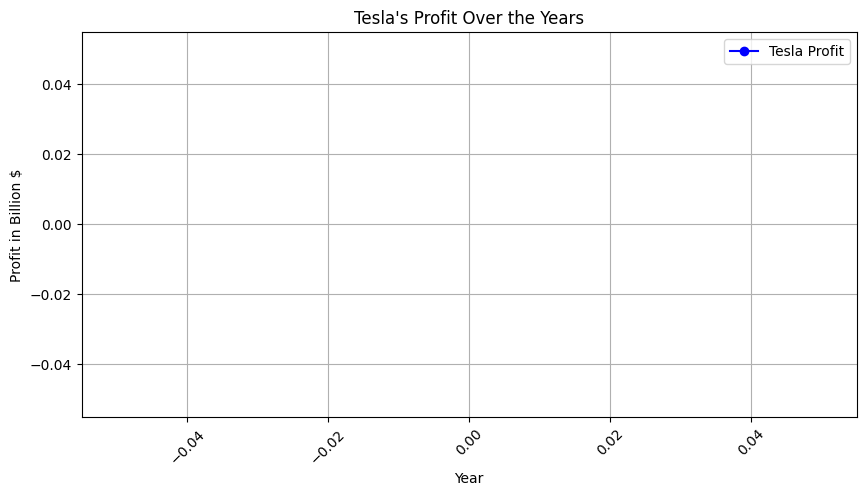

In [35]:
#Step 6: Visualize the data

plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Profit ($B)"], marker='o', linestyle='-', color='b', label="Tesla Profit")
plt.xlabel("Year")
plt.ylabel("Profit in Billion $")
plt.title("Tesla's Profit Over the Years")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()